In [1]:
%pylab inline

from fitting.fitting import Fit
import numpy.polynomial.polynomial as nppol

def mysavefig(name):
    plt.tight_layout()
    plt.savefig("images/"+name, dpi=200)

Populating the interactive namespace from numpy and matplotlib


# 21-02-05

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 2.73537954 -1.16173605]
        uncertainties   : [0.06996601 1.24136385]
        chi2r           : 0.343484161173116
        r2              : 0.9984294163046954
READABLE
        slope      = (2.74 +/- 0.07) * 1e0
        y0         = (-1 +/- 1) * 1e0
#######################


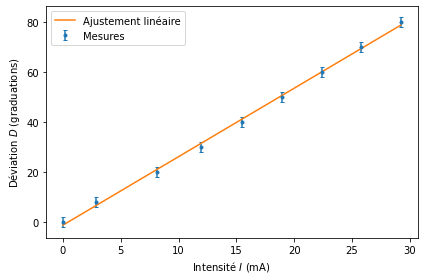

In [12]:
data = np.loadtxt("21-02-05.txt", skiprows=3)
u = data[:,0]
i_multi = data[:,1]*1e-3
i_galva = data[:,2]
ui = np.ones(len(i_galva))*2

fitter = Fit("linear", x=i_multi*1e3, y=i_galva, uy=ui)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
slope, y0 = fit_params

plt.errorbar(i_multi*1e3, i_galva, yerr=ui, fmt=".", capsize=2, label="Mesures")
plt.plot(i_multi*1e3, slope*i_multi*1e3 + y0, label="Ajustement linéaire")

plt.xlabel(r"Intensité $I$ (mA)")
plt.ylabel(r"Déviation $D$ (graduations)")

plt.legend()

mysavefig("mesure.png")

In [14]:
(2.74-3)/3*100

-8.66666666666666

In [18]:
4/5

0.8

# Théorie

0.69 0.5756688531657259 0.577937795482590 0.578334749996239
écart linéaire vs numérique     : 19.3900114153005 %
écart linéaire vs numérique corr: 19.3080650962937 %
écart DL 2nd ordre vs numérique : 0.392592824798611 %
0.14 0.13865424992837636 0.138656363651385 0.138792083150572
écart linéaire vs numérique     : 0.969040520919447 %
écart linéaire vs numérique corr: 0.870306736528582 %
écart DL 2nd ordre vs numérique : 0.00152443274340608 %
8.021409131831525


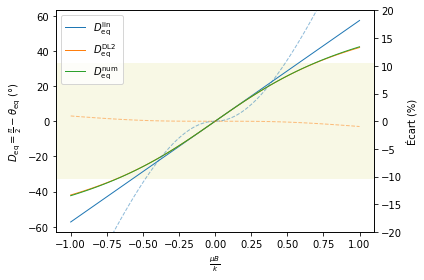

In [50]:
from sympy.solvers import solve, nsolve
from sympy import Symbol
import sympy

a = np.linspace(-1,1,100)

sol_lin = np.pi/2 - a
sol_2nd = np.pi/2 + (1-np.sqrt(1+2*a**2)) / a

x = Symbol("x")
sol_num = []
for val in a:
    sol = nsolve(val*sympy.sin(x) + x - np.pi/2, x, 1)
    sol_num.append(sol)
sol_num = np.array(sol_num)

x = Symbol("x")
p = 1e-3
sol_num_p = []
for val in a:
    sol = nsolve(val*sympy.sin(x) + x - np.pi/2 + p*sympy.cos(x), x, 1)
    sol_num_p.append(sol)
sol_num_p = np.array(sol_num_p)

plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,1), (0,0))
for sol, leg in zip([sol_lin, sol_2nd, sol_num], [r"$D_\mathrm{eq}^\mathrm{lin}$",
                                                             r"$D_\mathrm{eq}^\mathrm{DL2}$",
                                                             r"$D_\mathrm{eq}^\mathrm{num}$"]):
    plt.plot(a, (np.pi/2-sol)*180/np.pi, lw=1, label=leg)
l = plt.ylim()
plt.axhspan(-33, 33, color='y', alpha=0.1, lw=0)
l = plt.ylim(l)
plt.xlabel(r"$\frac{\mu B}{k}$")
plt.ylabel(r"$D_\mathrm{eq} = \frac{\pi}{2}-\theta_\mathrm{eq}\ (\degree)$")
plt.legend(loc="upper left")

ax2 = ax1.twinx()
plt.plot(a, -(sol_lin-sol_num)*100/np.abs(np.pi/2-sol_num), "--", lw=1, alpha=0.5)
#plt.plot(a, -(sol_lin-sol_num_p)*100/np.abs(np.pi/2-sol_num_p), "--", lw=1, alpha=0.5)
plt.plot(a, -(sol_2nd-sol_num)*100/np.abs(np.pi/2-sol_num), "--", lw=1, alpha=0.5)
plt.ylim(-20,20)
plt.ylabel(r"Écart (%)")

mysavefig("deviation.png")

a = 0.69
dev_lin = a
dev_2nd = - (1-np.sqrt(1+2*a**2)) / a
dev_num = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2, x, 1)
dev_num_p = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2 + p*sympy.cos(x), x, 1)
print(dev_lin, dev_2nd, dev_num, dev_num_p)
print("écart linéaire vs numérique     :", np.abs(dev_lin-dev_num)*100/dev_num, "%")
print("écart linéaire vs numérique corr:", np.abs(dev_lin-dev_num_p)*100/dev_num_p, "%")
print("écart DL 2nd ordre vs numérique :", np.abs(dev_2nd-dev_num)*100/dev_num, "%")

a = 0.14
dev_lin = a
dev_2nd = - (1-np.sqrt(1+2*a**2)) / a
dev_num = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2, x, 1)
dev_num_p = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2 + p*sympy.cos(x), x, 1)
print(dev_lin, dev_2nd, dev_num, dev_num_p)
print("écart linéaire vs numérique     :", np.abs(dev_lin-dev_num)*100/dev_num, "%")
print("écart linéaire vs numérique corr:", np.abs(dev_lin-dev_num_p)*100/dev_num_p, "%")
print("écart DL 2nd ordre vs numérique :", np.abs(dev_2nd-dev_num)*100/dev_num, "%")
print(a*180/np.pi)

# 2021-03-12

Ce jour, on remplace les bobinages résistifs des différents calibres du galvanomètre par des résistances modernes (type quart de watt).

Mesure 1 avec un résistance de 500 $\Omega$ à la place du premier bobinage résistif du galvanomètre.

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 7.25699459e+02 -2.71384885e-03]
        uncertainties   : [2.37503302 0.00309889]
        chi2r           : 0.8860222909861923
        r2              : 0.9999335736334585
READABLE
        slope      = (7.26 +/- 0.02) * 1e2
        y0         = (-3 +/- 3) * 1e-3
#######################


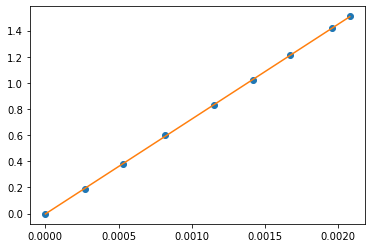

In [13]:
u = np.array([0, .19, .38, .6, .83, 1.02, 1.21, 1.42, 1.51])
uu = np.ones(len(u))*.005
i = np.array([0, .27, .53, .82, 1.15, 1.42, 1.67, 1.96, 2.08])*1e-3

fitter = Fit("linear", x=i, y=u, uy=uu)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)

slope, y0 = fit_params
plt.plot(i, u, "o")
plt.plot(i, slope*i+y0, "-C1")

Problème : la résistance mesurée est de 725 $\Omega$ au lieu de 500.
Ah mais c'est bien sûr !
On a pas pris en compte la résistance de la bobine de l'aiguille du galva.
On mesure sa résistance à l'ohmmètre et on trouve $150 \Omega$.

Problème, il reste $75 \Omega$ de différence.
Cela vient du montage réalisé pour la mesure de U et I.
On met cette fois le voltmètre aux bornes du galvanomètre.

On enlève des résistances pour mettre $350 \Omega$ sur le premier calibre du galva.
Cette fois avec la résistance de la bobine de l'aiguille, on a bien $500 \Omega$ en principe.

Mesure 2 avec un résistance de 500 $\Omega$ à la place du premier bobinage résistif du galvanomètre.

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [5.16047586e+02 6.70094954e-03]
        uncertainties   : [1.72312523 0.00310608]
        chi2r           : 1.8317539084518477
        r2              : 0.9998570588634612
READABLE
        slope      = (5.16 +/- 0.02) * 1e2
        y0         = (7 +/- 3) * 1e-3
#######################
[ 0.          0.62694986 -0.88550513 -0.54833209 -0.71115906 -1.17398602
 -0.53681298 -0.29963994 -1.52083024]


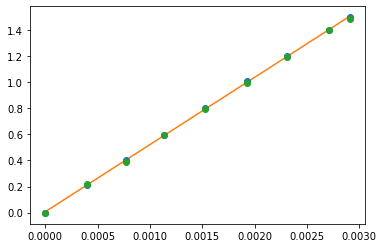

In [15]:
u = np.array([0, .211, .401, .599, .802, 1.008, 1.203, 1.402, 1.499])
uu = np.ones(len(u))*.005
i = np.array([0, .4, .77, 1.13, 1.53, 1.93, 2.31, 2.71, 2.91])*1e-3

galva = np.array([0, 20.5, 37, 56, 75, 94, 113, 132, 140])
ugalva= np.ones(len(galva))

fitter = Fit("linear", x=i, y=u, uy=uu)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)

slope, y0 = fit_params
plt.errorbar(i, u, yerr=uu, fmt="o")
plt.plot(i, slope*i+y0)

fitter = Fit("linear", x=i[:6], y=galva[:6], uy=uu[:6])
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
slope_galva = fit_params[0]
scale = slope/slope_galva


plt.errorbar(i, galva*scale, yerr=ugalva*scale,fmt="o")

print((galva*scale - u)*100)

On ne retrouve pas du tout les 20 % d'écart qu'on devrait obtenir

# Todo list

- Vérifier la linéarité des graduations. En particulier : vérifier que les graduations ne sont pas plus rapprochées vers les valeurs maximales.
- Vérifier l'influence de l'inclinaison du galvanomètre sur la valeur lue

# 2021-03-18

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 0.09959964 -1.32468675]
        uncertainties   : [0.0013334  1.25640018]
        chi2r           : 0.12505716774559877
        r2              : 0.9998431291812006
READABLE
        slope      = (1.00 +/- 0.01) * 1e-1
        y0         = (-1 +/- 1) * 1e0
#######################
0.1950676659011249


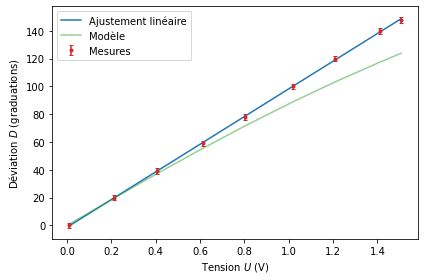

In [89]:
u = np.array([9, 211, 406, 613, 805, 1018, 1208, 1412, 1506]) # voltmètre (mV)
g = np.array([0, 20, 39, 59, 78, 100, 120, 140, 148]) # galva voltmètre (grad)
ug= np.ones(len(g)) * 2

fitter = Fit("linear", x=u, y=g, uy=ug)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
slope, y0 = fit_params

plt.xlabel(r"Tension $U$ (V)")
plt.ylabel(r"Déviation $D$ (graduations)")

plt.errorbar(u/1e3, g, yerr=ug, fmt=".C3", capsize=2, label="Mesures")
plt.plot(u/1e3, u*slope+y0, "-C0", label="Ajustement linéaire")

a = u*1e-3 * 0.356
sol_2nd = np.pi/2 + (1-np.sqrt(1+2*a**2)) / a
D = (np.pi/2 - sol_2nd) * 180 / np.pi * 150 / 33
plt.plot(u*1e-3, D, "-C2", alpha=.5, label="Modèle")
plt.legend()
mysavefig("galva_lin.png")

print((g[-1]-D[-1])/D[-1])

In [45]:
x = 10 * np.pi / 180

x**2 / 2 * 100

1.5230870989335428

In [94]:
sin(49*np.pi/180)

0.7547095802227719

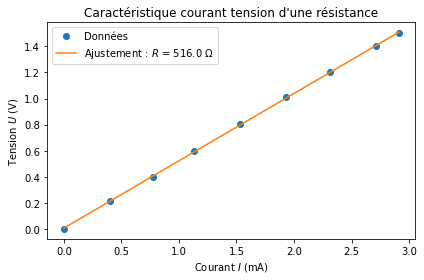

In [13]:
u = np.array([0, .211, .401, .599, .802, 1.008, 1.203, 1.402, 1.499])
uu = np.ones(len(u))*.005
i = np.array([0, .4, .77, 1.13, 1.53, 1.93, 2.31, 2.71, 2.91])*1e-3

fitter = Fit("linear", x=i, y=u, uy=uu)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)

slope, y0 = fit_params
plt.plot(i*1e3, u, "o", label="Données")
plt.plot(i*1e3, slope*i+y0, "-C1", label="Ajustement : $R$ = %.1f $\Omega$"%(slope))

plt.xlabel("Courant $I$ (mA)")
plt.ylabel("Tension $U$ (V)")
plt.title("Caractéristique courant tension d'une résistance")
plt.legend()
mysavefig("dm0_python.png")